lable encoding - best case to use in ordinary categorical data 

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

# from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

C:\Users\ayush\AppData\Local\Temp\ipykernel_15280\2643667214.py:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [2]:
data = r"C:\machine learning\50_Startups (2).csv"
df = pd.read_csv(data)
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# OBJECTIVE - To the pridect the profit made by a startup on the basic of expenceses incurred and the state where the operate

In [3]:
# handling categorical column
df['State']

0       New York
1     California
2        Florida
3       New York
4        Florida
5       New York
6     California
7        Florida
8       New York
9     California
10       Florida
11    California
12       Florida
13    California
14       Florida
15      New York
16    California
17      New York
18       Florida
19      New York
20    California
21      New York
22       Florida
23       Florida
24      New York
25    California
26       Florida
27      New York
28       Florida
29      New York
30       Florida
31      New York
32    California
33       Florida
34    California
35      New York
36       Florida
37    California
38      New York
39    California
40    California
41       Florida
42    California
43      New York
44    California
45      New York
46       Florida
47    California
48      New York
49    California
Name: State, dtype: object

In [4]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

# technique for handliing categorical column

# 1. one hot encoding
# 2. label encoding 
# 3. target encoding


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


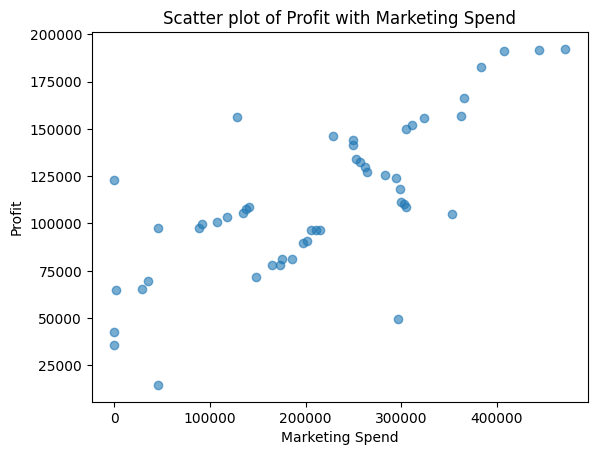

In [6]:
plt.scatter(df['Marketing Spend'], df['Profit'], alpha=0.6)
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

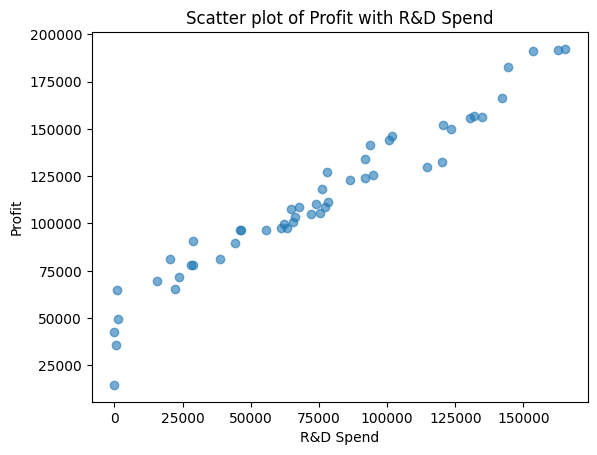

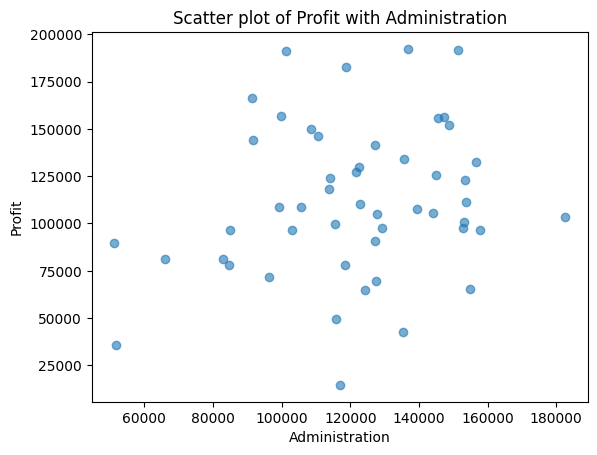

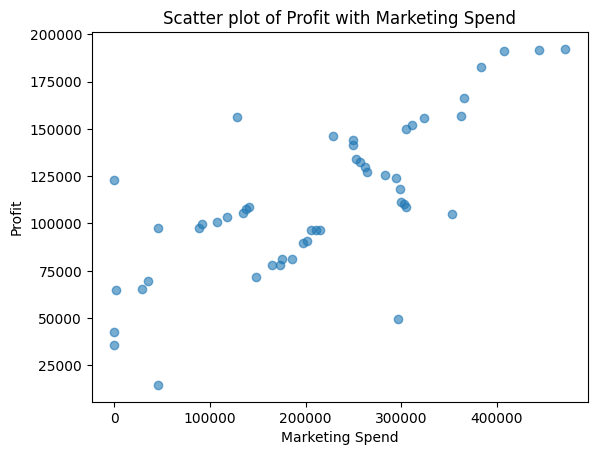

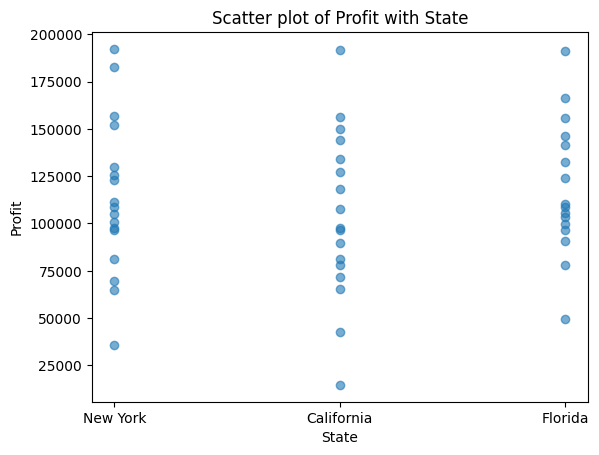

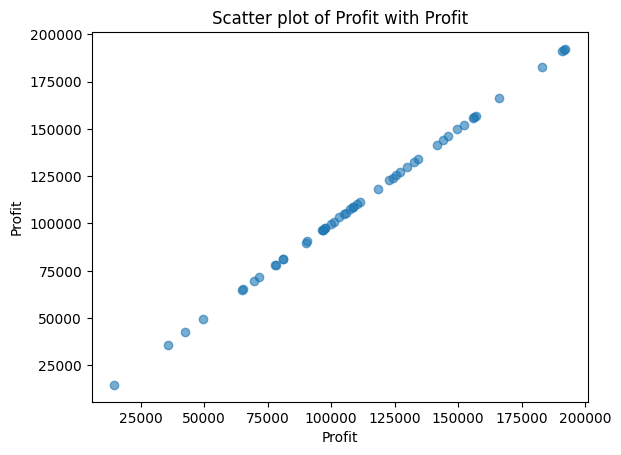

In [7]:
for i in df.columns:
    plt.scatter(df[i], df['Profit'], alpha=0.6)
    plt.title('Scatter plot of Profit with '+i)
    plt.xlabel(i)
    plt.ylabel('Profit')
    plt.show()

# one hot encoding - saprate the num of column and put data in the form of 0 and 1 

In [8]:
for i in df['State'].unique() :
    df[i] = np.where(df['State']==i,1,0)

df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,New York,California,Florida
0,165349.20,136897.80,471784.10,New York,192261.83,1,0,0
1,162597.70,151377.59,443898.53,California,191792.06,0,1,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,0,1
3,144372.41,118671.85,383199.62,New York,182901.99,1,0,0
4,142107.34,91391.77,366168.42,Florida,166187.94,0,0,1


In [9]:
#df.drop(df['State'],axis= 1,inplace=True)

In [10]:
df.drop(columns='State',axis= 1,inplace=True)

In [11]:
df

,R&D Spend,Administration,Marketing Spend,Profit,New York,California,Florida
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1
5,131876.90,99814.71,362861.36,156991.12,1,0,0
6,134615.46,147198.87,127716.82,156122.51,0,1,0
7,130298.13,145530.06,323876.68,155752.60,0,0,1
8,120542.52,148718.95,311613.29,152211.77,1,0,0
9,123334.88,108679.17,304981.62,149759.96,0,1,0


In [12]:
x = df.drop(['Profit'],axis=1)
x

,R&D Spend,Administration,Marketing Spend,New York,California,Florida
0,165349.20,136897.80,471784.10,1,0,0
1,162597.70,151377.59,443898.53,0,1,0
2,153441.51,101145.55,407934.54,0,0,1
3,144372.41,118671.85,383199.62,1,0,0
4,142107.34,91391.77,366168.42,0,0,1
5,131876.90,99814.71,362861.36,1,0,0
6,134615.46,147198.87,127716.82,0,1,0
7,130298.13,145530.06,323876.68,0,0,1
8,120542.52,148718.95,311613.29,1,0,0
9,123334.88,108679.17,304981.62,0,1,0


In [13]:
y = df['Profit']
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [14]:
x_train ,x_test ,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [15]:
x_train

,R&D Spend,Administration,Marketing Spend,New York,California,Florida
32,63408.86,129219.61,46085.25,0,1,0
39,38558.51,82982.09,174999.30,0,1,0
21,78389.47,153773.43,299737.29,1,0,0
36,28663.76,127056.21,201126.82,0,0,1
19,86419.70,153514.11,0.00,1,0,0
42,23640.93,96189.63,148001.11,0,1,0
49,0.00,116983.80,45173.06,0,1,0
26,75328.87,144135.98,134050.07,0,0,1
22,73994.56,122782.75,303319.26,0,0,1
13,91992.39,135495.07,252664.93,0,1,0


In [16]:
y_train

32     97427.84
39     81005.76
21    111313.02
36     90708.19
19    122776.86
42     71498.49
49     14681.40
26    105733.54
22    110352.25
13    134307.35
41     77798.83
17    125370.37
45     64926.08
24    108552.04
23    108733.99
4     166187.94
33     96778.92
14    132602.65
30     99937.59
10    146121.95
28    103282.38
44     65200.33
34     96712.80
18    124266.90
20    118474.03
25    107404.34
6     156122.51
7     155752.60
47     42559.73
1     191792.06
16    126992.93
0     192261.83
15    129917.04
5     156991.12
11    144259.40
9     149759.96
8     152211.77
12    141585.52
43     69758.98
37     89949.14
Name: Profit, dtype: float64

In [17]:
y_test

27    105008.31
35     96479.51
40     78239.91
38     81229.06
2     191050.39
3     182901.99
48     35673.41
29    101004.64
46     49490.75
31     97483.56
Name: Profit, dtype: float64

In [18]:
x_test

,R&D Spend,Administration,Marketing Spend,New York,California,Florida
27,72107.60,127864.55,353183.81,1,0,0
35,46014.02,85047.44,205517.64,1,0,0
40,28754.33,118546.05,172795.67,0,1,0
38,20229.59,65947.93,185265.10,1,0,0
2,153441.51,101145.55,407934.54,0,0,1
3,144372.41,118671.85,383199.62,1,0,0
48,542.05,51743.15,0.00,1,0,0
29,65605.48,153032.06,107138.38,1,0,0
46,1315.46,115816.21,297114.46,0,0,1
31,61136.38,152701.92,88218.23,1,0,0


In [19]:
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [20]:
x_train[:10]

array([[0.38348453, 0.5932935 , 0.09768292, 0.        , 1.        ,
        0.        ],
       [0.23319442, 0.24130912, 0.3709309 , 0.        , 1.        ,
        0.        ],
       [0.47408436, 0.78021012, 0.63532724, 1.        , 0.        ,
        0.        ],
       [0.17335288, 0.57682456, 0.42631115, 0.        , 0.        ,
        1.        ],
       [0.52264964, 0.77823604, 0.        , 1.        , 0.        ,
        0.        ],
       [0.14297577, 0.34185188, 0.31370517, 0.        , 1.        ,
        0.        ],
       [0.        , 0.50014806, 0.09574943, 0.        , 1.        ,
        0.        ],
       [0.45557444, 0.70684477, 0.28413435, 0.        , 0.        ,
        1.        ],
       [0.4475048 , 0.54429273, 0.64291963, 0.        , 0.        ,
        1.        ],
       [0.55635219, 0.64106561, 0.53555202, 0.        , 1.        ,
        0.        ]])

In [21]:
x_test

array([[0.46805626, 0.75152749, 0.8657855 , 1.        , 0.        ,
        0.        ],
       [0.29739785, 0.3288049 , 0.50380054, 1.        , 0.        ,
        0.        ],
       [0.18451524, 0.65952827, 0.42358676, 0.        , 1.        ,
        0.        ],
       [0.12876134, 0.14024023, 0.45415399, 1.        , 0.        ,
        0.        ],
       [1.        , 0.4877375 , 1.        , 0.        , 0.        ,
        1.        ],
       [0.94068586, 0.66077027, 0.93936547, 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.4255308 , 1.        , 0.26263621, 1.        , 0.        ,
        0.        ],
       [0.00505829, 0.63257725, 0.72833857, 0.        , 0.        ,
        1.        ],
       [0.39630179, 0.99674061, 0.21625585, 1.        , 0.        ,
        0.        ]])

In [22]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [23]:
regressor.intercept_

-1.200797110510261e+19

In [24]:
regressor.coef_

array([1.28036844e+05, 4.64629833e+03, 1.26764102e+04, 1.20079711e+19,
       1.20079711e+19, 1.20079711e+19])

In [25]:
y_pred = regressor.predict(x_test)

y_pred

array([126976.,  98304.,  77824.,  73728., 186368., 186368.,  51200.,
       112640.,  55296., 108544.])

In [26]:
y_test

27    105008.31
35     96479.51
40     78239.91
38     81229.06
2     191050.39
3     182901.99
48     35673.41
29    101004.64
46     49490.75
31     97483.56
Name: Profit, dtype: float64

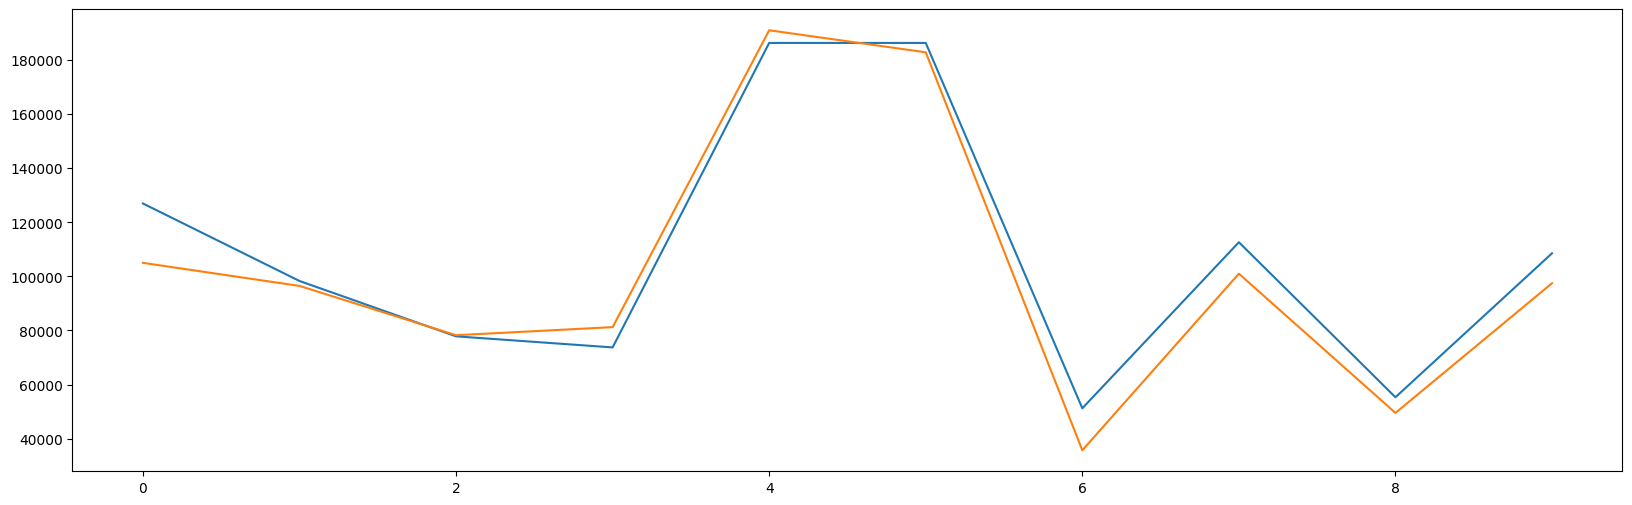

In [27]:
plt.figure(figsize=(20,6))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.show()

In [28]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,New York,California,Florida
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [29]:
df2 = pd.read_csv(data)

In [30]:
df2

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [31]:
df2['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [32]:
def conv(str):
    if str =='New York':
        return 0 
    elif str == "California":
        return 1
    else :
        return 2

In [33]:
df2['State'] = df2['State'].apply(conv)

In [34]:
df2.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [35]:
X = df2.drop(['Profit'],axis=1)
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,0
1,162597.70,151377.59,443898.53,1
2,153441.51,101145.55,407934.54,2
3,144372.41,118671.85,383199.62,0
4,142107.34,91391.77,366168.42,2
5,131876.90,99814.71,362861.36,0
6,134615.46,147198.87,127716.82,1
7,130298.13,145530.06,323876.68,2
8,120542.52,148718.95,311613.29,0
9,123334.88,108679.17,304981.62,1


In [36]:
Y = df2['Profit']
Y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [37]:
X_train ,X_test ,Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [38]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [39]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [40]:
Y_pred = regressor.predict(X_test)

Y_pred

array([119996.97137246,  93637.91767194,  77890.37922305,  71561.24376748,
       190662.64686318, 181664.11848278,  48989.30138078, 105994.40888787,
        59295.55821824, 101616.69824445])

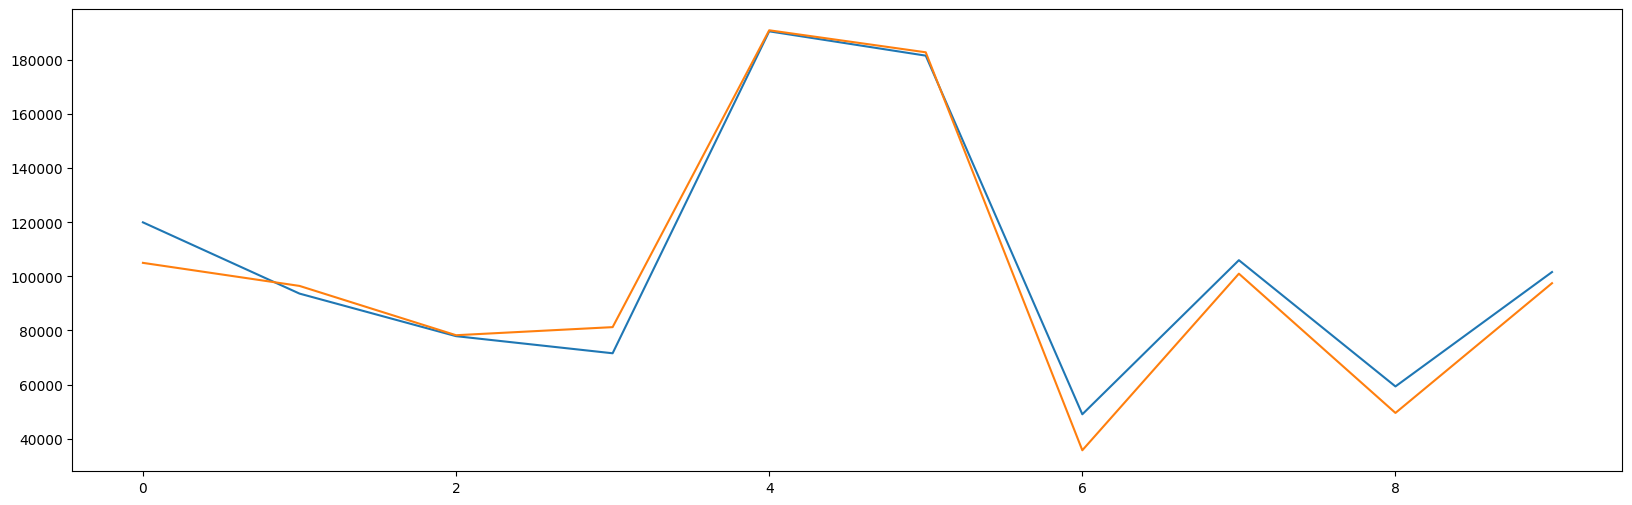

In [41]:
plt.figure(figsize=(20,6))
plt.plot(Y_pred)
plt.plot(np.array(Y_test))
plt.show()

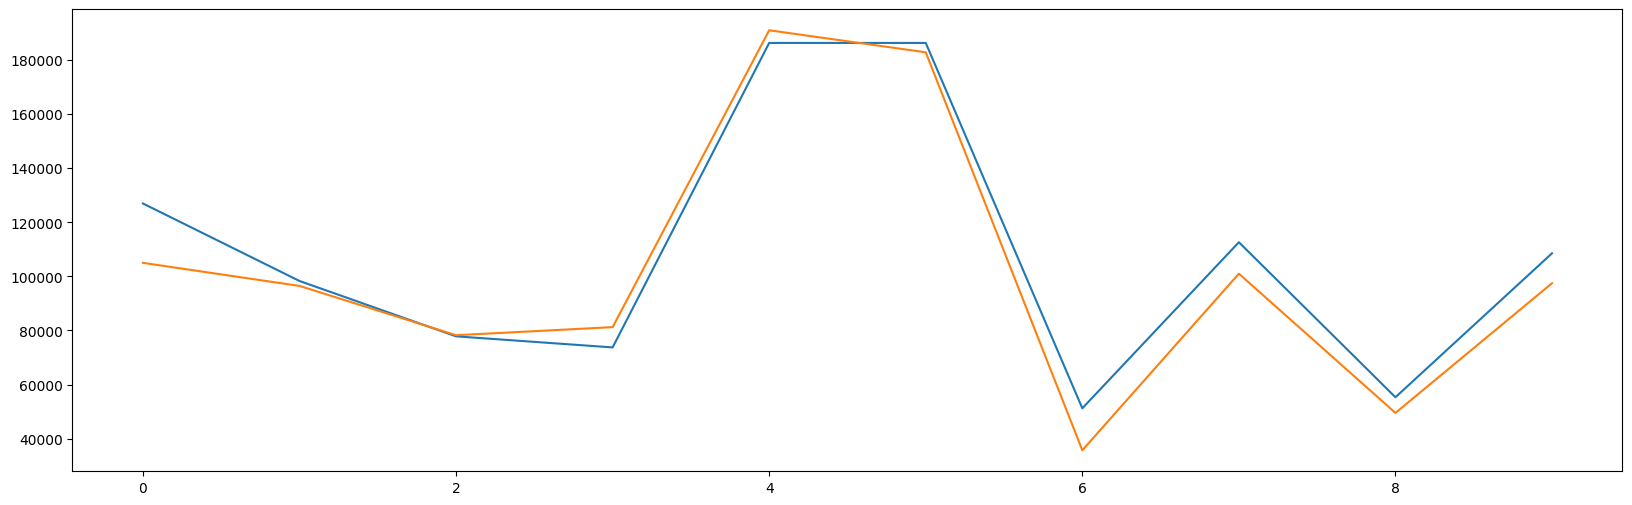

In [42]:
plt.figure(figsize=(20,6))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.show()

In [43]:
mean_squared_error(y_test,y_pred)

110877591.12939003

In [44]:
mean_squared_error(Y_test,Y_pred)

64343398.256356515

In [45]:
mean_squared_error(Y_test,Y_pred)**0.5

8021.433678361775

In [46]:
(mean_squared_error(y_test,y_pred))**0.5

10529.842882464583

In [47]:
r2_score(y_test,y_pred)

0.9511298928133809

In [48]:
r2_score(Y_test,Y_pred)

0.9716401778077053

In [49]:
z = pd.DataFrame(np.array([153441.51,101150.0,407934.20,0,0,1])).T
z

,0,1,2,3,4,5
0,153441.51,101150.0,407934.2,0.0,0.0,1.0


In [50]:
observation = scaler.transform(z)
observation

c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: X has 6 features, but MinMaxScaler is expecting 4 features as input.